## Classification
Задача классификации – это задача обучения с учителем, исходные данные
размечены, то есть известны классы объектов. 

Основная цель классификации — это определение класса, к которому относится некоторый объект
- логистическая регрессия;
- Support Vector Machine (SVM);
- дерево решений, случайный лес, градиентный бустинг;
- k Nearest Neighbor (KNN);

Метрики оценки качества модели для задачи классификации:
- *Accuracy* Доля правильных ответов.
- *Precision* Точность.
- *Recall* Полнота.
- *F-мера* Самая полезная метрика, которая совмещает в себе Precision и Recall.


### Accuracy 
Accuracy $=\frac{\text { Сумма верно предсказанных }}{\text { Количество всех объектов }}$

### Precision 

Precision $=\frac{T P}{T P+F P}$

### Recall

Recall $=\frac{T P}{T P+F N}$

### F-мера

$F_\beta=\left(1+\beta^2\right) \frac{\text { Precision } \cdot \text { Recall }}{\beta^2 \cdot \text { Precision }+ \text { Recall }}$


In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
data = pd.read_csv('mushroom_cleaned.csv')
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


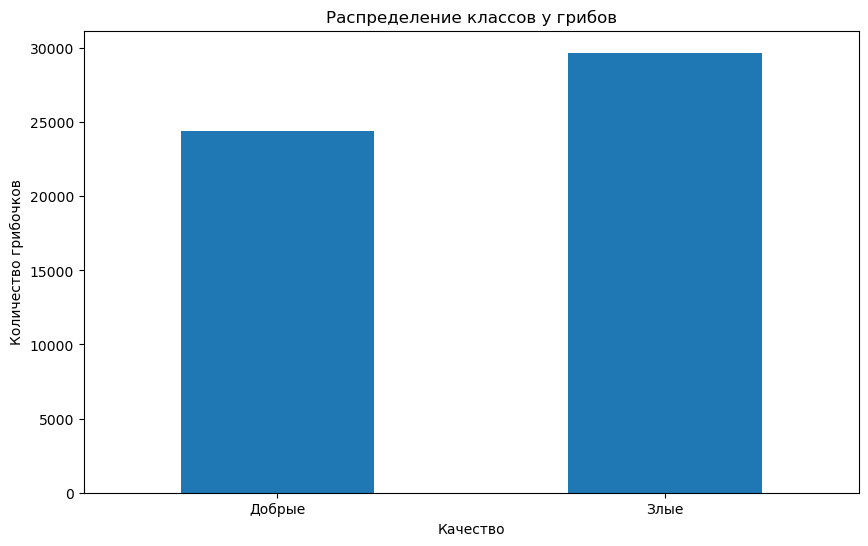

In [3]:
plt.figure(figsize=(10, 6))
data['class'].value_counts().sort_index().plot(kind='bar')

plt.title('Распределение классов у грибов')
plt.xlabel('Качество')
plt.xticks(
    rotation=0, 
    ticks=np.arange(0, 2), 
    labels=['Добрые', 'Злые']
)
plt.ylabel('Количество грибочков')

plt.show()

In [4]:
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
models = {
    'Логистическая регрессия': LogisticRegression(solver='lbfgs', max_iter=500),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {model_name} ---")
    print("Матрица смешанных ошибок:")
    print(confusion_matrix(y_test, y_pred))
    print("Отчет о классификации:")
    print(classification_report(y_test, y_pred))
    print("Accuracy: ", model.score(X_test, y_test))

--- Логистическая регрессия ---
Матрица смешанных ошибок:
[[2707 2165]
 [1691 4244]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.62      0.56      0.58      4872
           1       0.66      0.72      0.69      5935

    accuracy                           0.64     10807
   macro avg       0.64      0.64      0.64     10807
weighted avg       0.64      0.64      0.64     10807

Accuracy:  0.6431942259646526
--- SVM ---
Матрица смешанных ошибок:
[[2932 1940]
 [1848 4087]]
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.61      0.60      0.61      4872
           1       0.68      0.69      0.68      5935

    accuracy                           0.65     10807
   macro avg       0.65      0.65      0.65     10807
weighted avg       0.65      0.65      0.65     10807

Accuracy:  0.6494864439714999
--- KNN ---
Матрица смешанных ошибок:
[[3324 1548]
 [1572 4363]]
Отчет о классификации:
  